<a href="https://colab.research.google.com/github/mylethidiem/data-science-artificial-intelligence-projects/blob/heart_disease_diagnosis/Heart-Disease-Diagnosis/notebooks/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Environment Setup

In [1]:
import os
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler

# Đặt seed để đảm bảo nhất quán giữa các lần chạy
# os.environ["PYTHONHASHSEED"] = "42"
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
print("Seed = ", RANDOM_SEED)

Seed =  42


## 2.Data Processing

In [2]:
# cleveland.csv
# https://drive.google.com/file/d/16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju/view?usp=sharing
!gdown 16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju

Downloading...
From: https://drive.google.com/uc?id=16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 27.6MB/s]


In [3]:
# Full dataaset
!mv cleveland.csv ../data/

### Processing

In [4]:
DATA_PATH = '../data/cleveland.csv'
COLUMNS = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']

raw = pd.read_csv(DATA_PATH, header=None)
raw.columns = COLUMNS

raw.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
# convert columns to numeric, coerce errors to NaN
for c in ['age','trestbps','chol','thalach','oldpeak','ca','thal']:
    raw[c] = pd.to_numeric(raw[c], errors='coerce')

raw['target'] = (raw['target'] > 0).astype(int)
print("Shape:", raw.shape)
display(raw.head())
display(raw.isna().sum())

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Statistic

In [6]:
# basic statistic
display(raw.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Plotting data

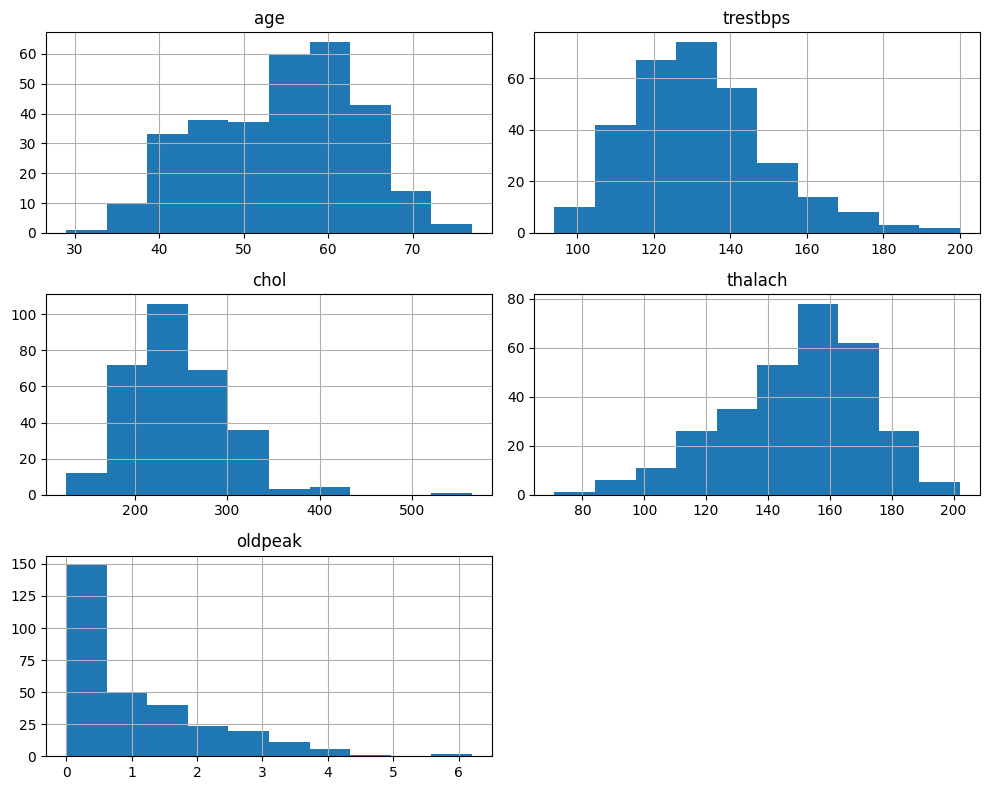

In [7]:
# Define numerical, categorical columns before plotting
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

# Plot histograms for numerical columns
raw[numeric_cols].hist(figsize=(10, 8), bins=10)
plt.tight_layout() #Adjusts the spacing between sub-charts
plt.show()


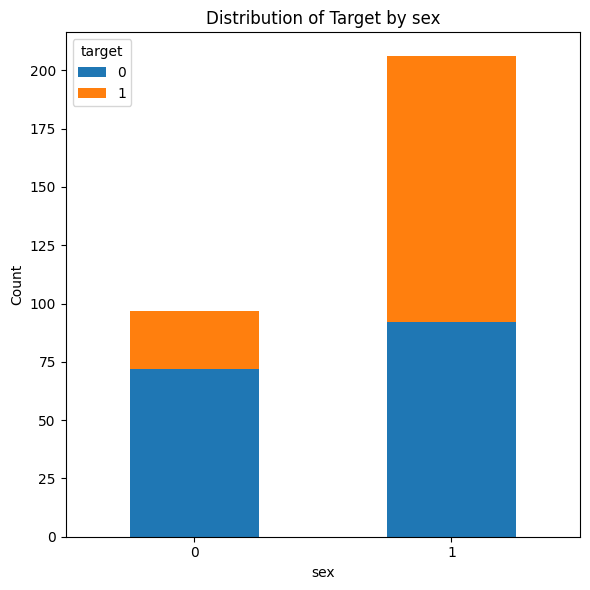

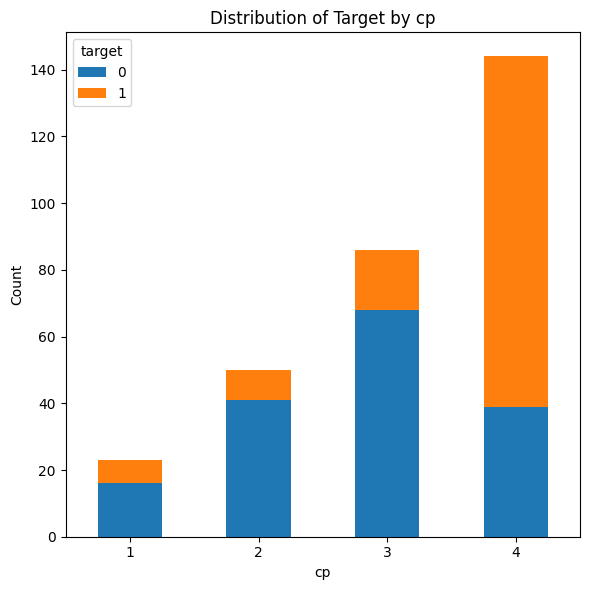

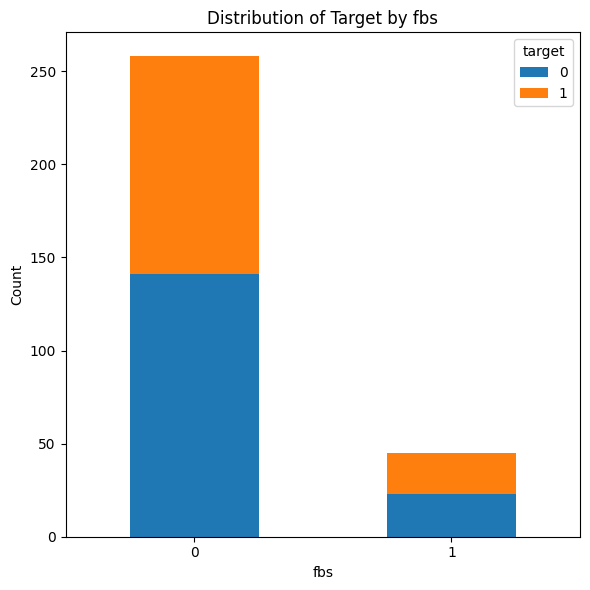

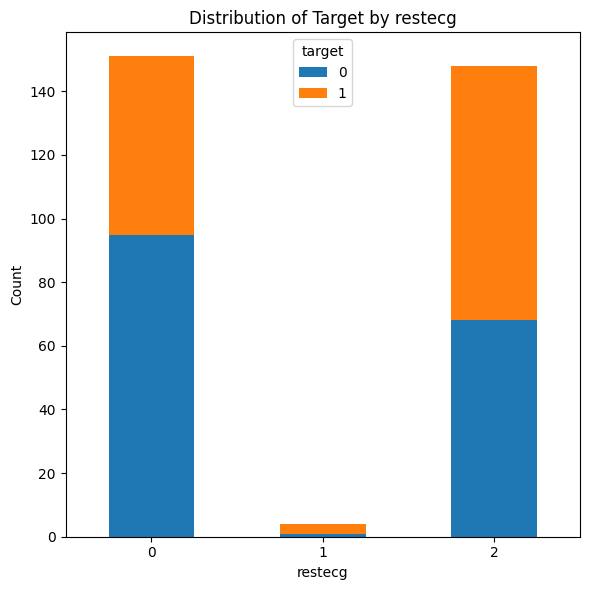

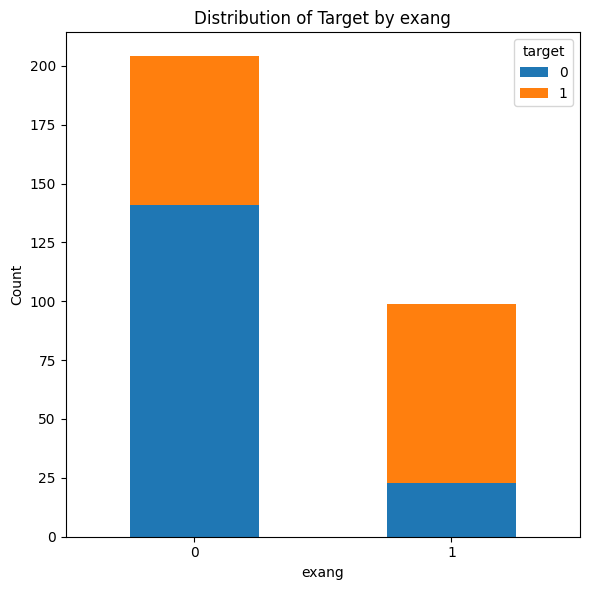

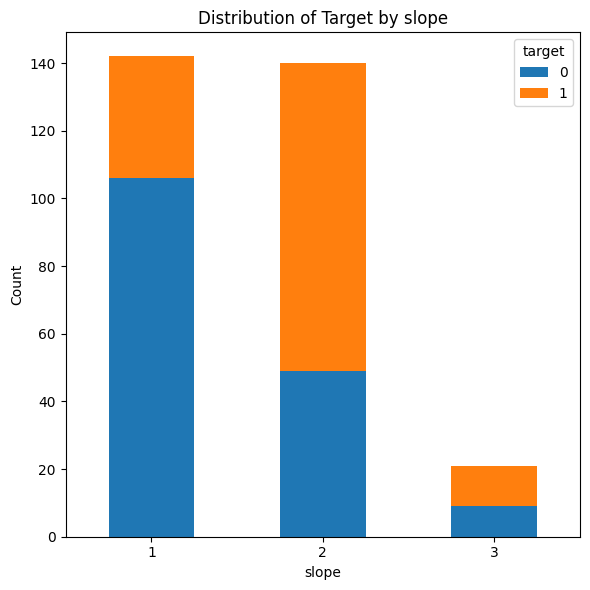

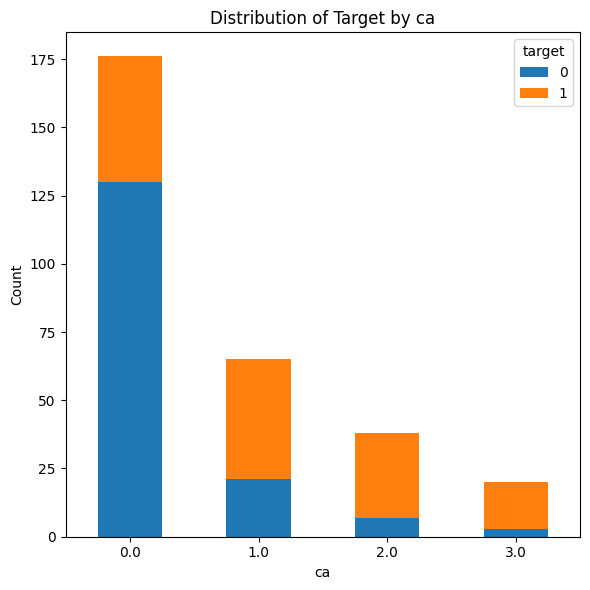

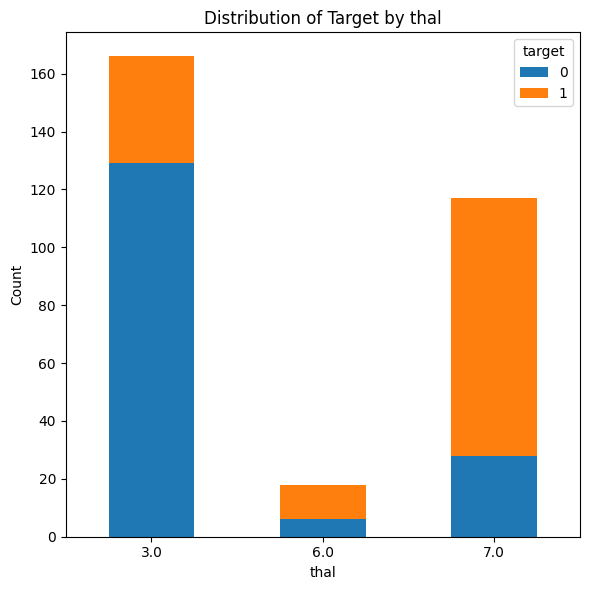

In [8]:
# Plot count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    raw.groupby([col, 'target']).size().unstack().plot(
        kind='bar',        # bar chart
        stacked=True,      # Stack the bars (shows how 'target' is split within each category).
        ax=plt.gca()       # Plot the chart onto the current figure.
    )
    plt.title(f'Distribution of Target by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0) # X-axis labels horizontal for easy reading.
    plt.tight_layout()
    plt.show()

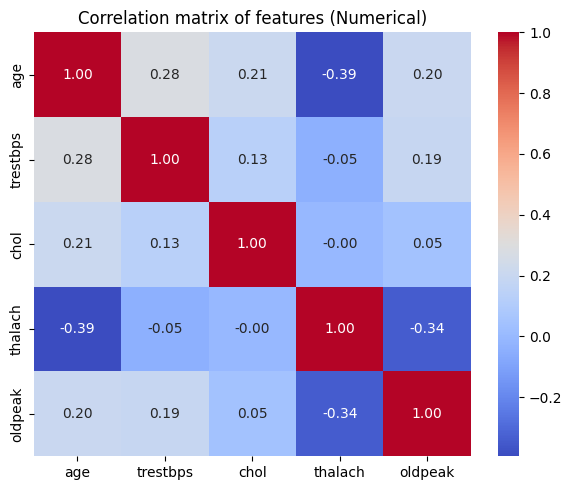

In [9]:
import seaborn as sns
plt.figure(figsize=(6, 5))
corr_matrix = raw[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix of features (Numerical)")
plt.tight_layout()
plt.show()


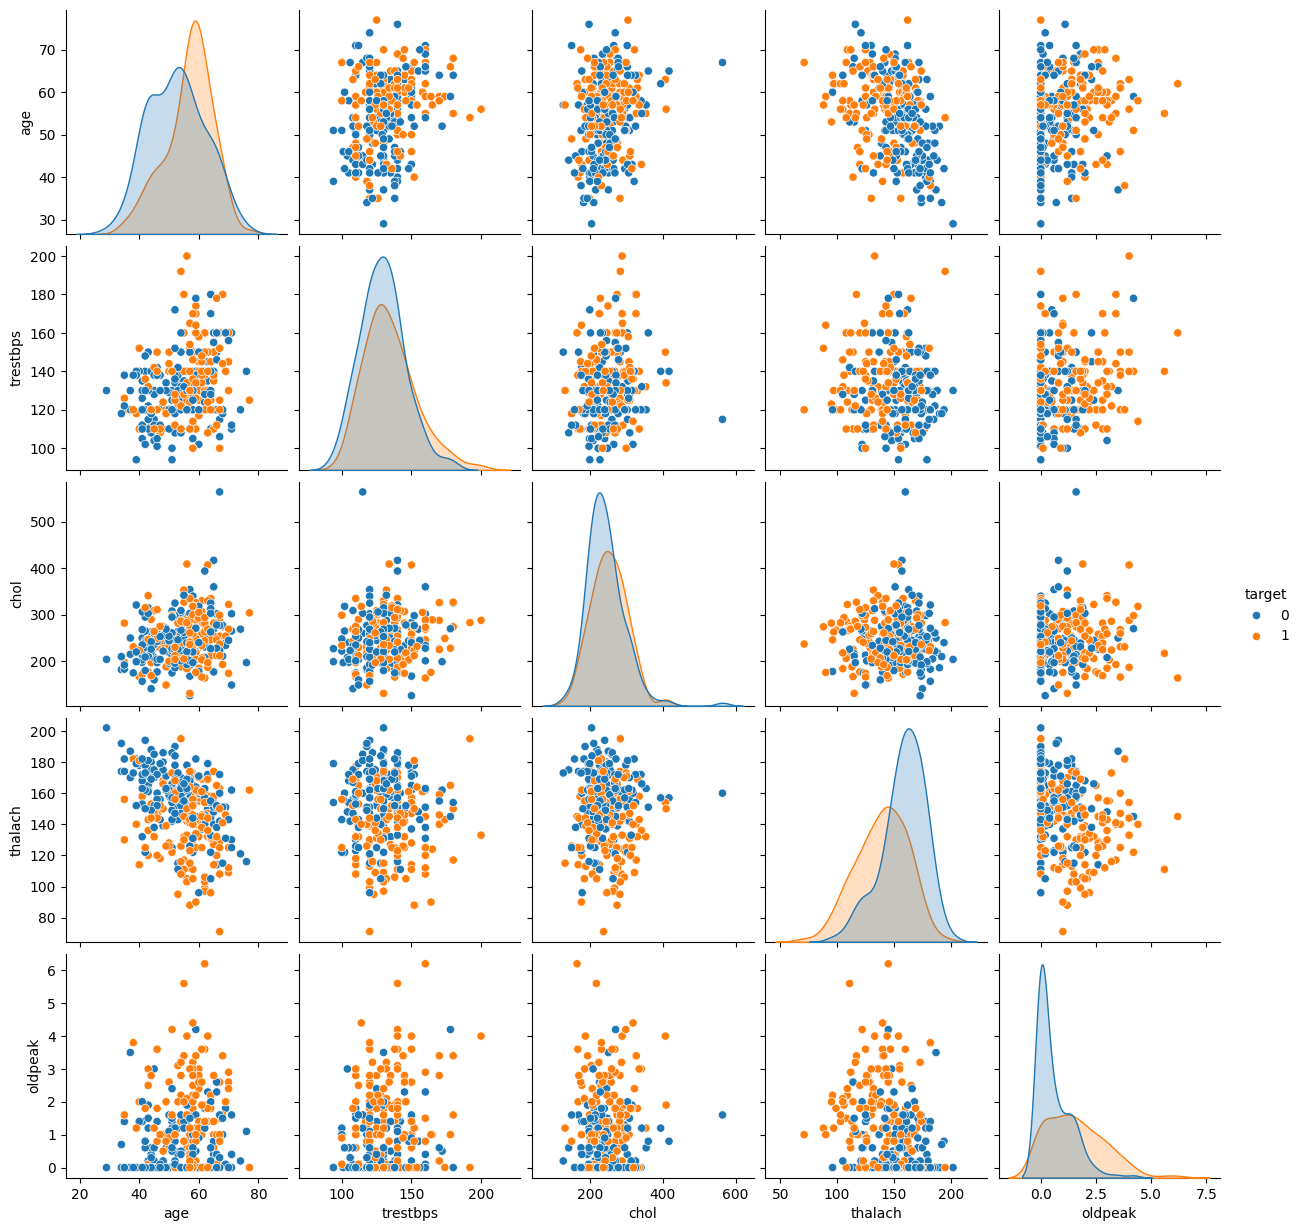

<Figure size 1000x1000 with 0 Axes>

In [10]:
sns.pairplot(raw, vars=numeric_cols, hue="target", diag_kind="kde")
plt.figure(figsize=(10, 10))
plt.suptitle("Distribution of each pair of features (in numeric form) by label", y=1.02)
plt.savefig("pairwise_distribution.pdf", bbox_inches="tight")
plt.show()

## 3.Visual Explorations

In [11]:
X = raw.drop(columns=['target'])
y = raw['target']

# Colors by target
# colors = np.where(y==0, "tab:blue", "tab:red")
colors = ['tab:blue' if t==0 else 'tab:red' for t in y]

def scatter_with_regression(x_series, y_series, x_label, y_label, title):
    # Drop NaNs for fitting
    m = x_series.notna() & y_series.notna()
    x = x_series[m].values.reshape(-1, 1) # series will convert to numpy array and then reshape to 2D matrix having 1 column
    # scikit-learn requires 2D input for features
    yy = y_series[m].values

    # Fit linear regression
    if len(x) > 1:
        model = LinearRegression()
        model.fit(x, yy)
        # Create line
        x_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1) # create 100 points between x min and x max
        y_pred = model.predict(x_line)
    else:
        x_line, y_pred = None, None

    # Plot scatter
    plt.figure()
    plt.scatter(x_series, y_series, c=colors, alpha=0.7)
    plt.xlabel(x_label); plt.ylabel(y_label)
    plt.title(title)

    # Plot regression line
    if x_line is not None:
        plt.plot(x_line.ravel(), y_pred) # Convert x_line from 2D to 1D
    plt.tight_layout()
    plt.show()

### Analyse 'age' with 'chol', 'trestbps', 'thalach' column

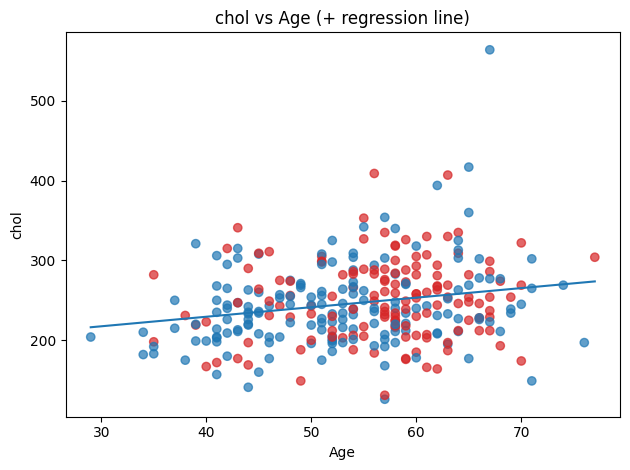

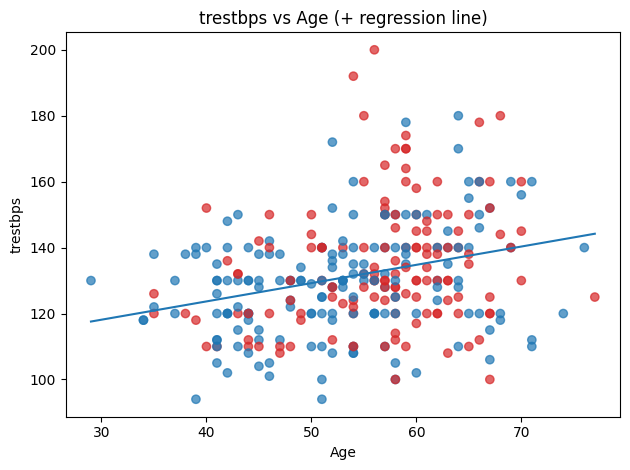

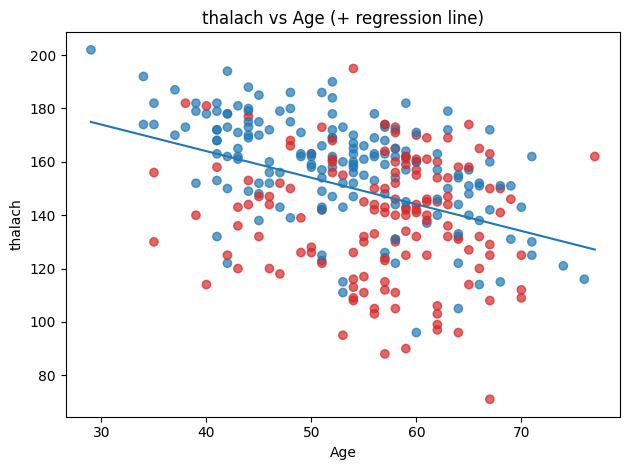

In [12]:
# Scatter + regression for selected pairs
if 'age' in X.columns:
    for col in ['chol', 'trestbps', 'thalach']:
        if col in X.columns:
            scatter_with_regression(X['age'], X[col], 'Age', col, f'{col} vs Age (+ regression line)')


/tmp/ipython-input-2631435774.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean() # Calculate mean of m ('chol','trestbps','thalach') for each age bin


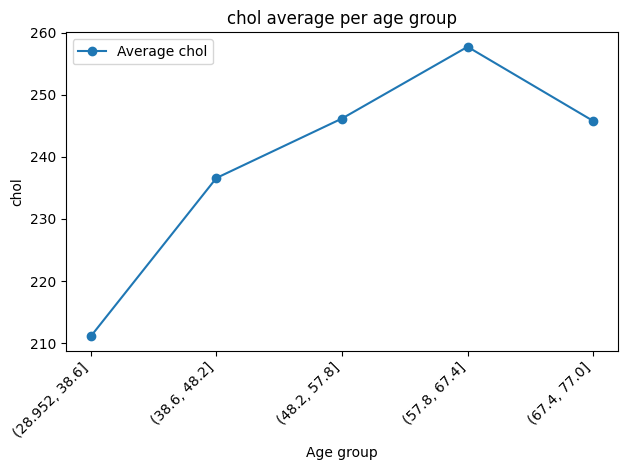

/tmp/ipython-input-2631435774.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean() # Calculate mean of m ('chol','trestbps','thalach') for each age bin


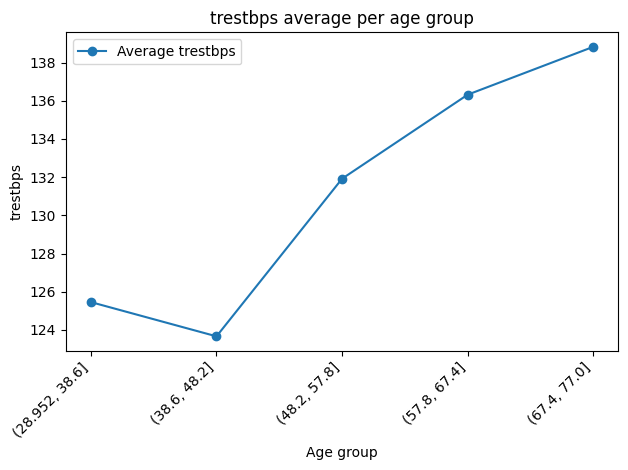

/tmp/ipython-input-2631435774.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vals = X.groupby(age_bins)[m].mean() # Calculate mean of m ('chol','trestbps','thalach') for each age bin


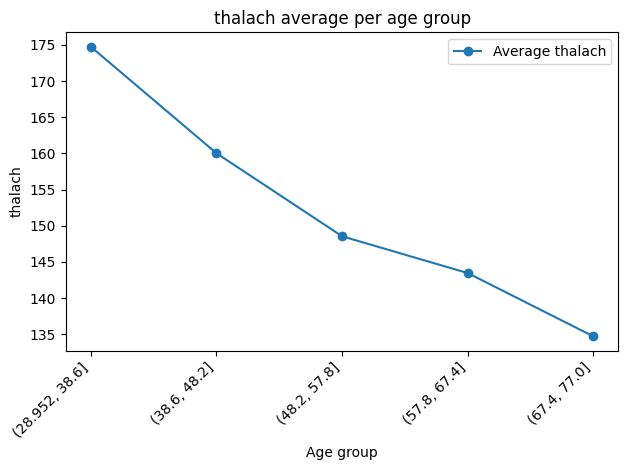

In [13]:
# Group means by age bins
if 'age' in X.columns:
    age_bins = pd.cut(X['age'], bins=5)
    for m in ['chol','trestbps','thalach']:
        if m in X.columns:
            plt.figure()
            avg_vals = X.groupby(age_bins)[m].mean() # Calculate mean of m ('chol','trestbps','thalach') for each age bin
            plt.plot(range(len(avg_vals)), avg_vals, marker='o', label=f'Average {m}')
            plt.xticks(range(len(avg_vals)), [str(i) for i in avg_vals.index], rotation=45, ha='right') # set x ticks for 5 age groups, label is age bin range, map(str, avg_vals.index)
            plt.xlabel('Age group'); plt.ylabel(m)
            plt.title(f'{m} average per age group')
            plt.legend(); plt.tight_layout(); plt.show()


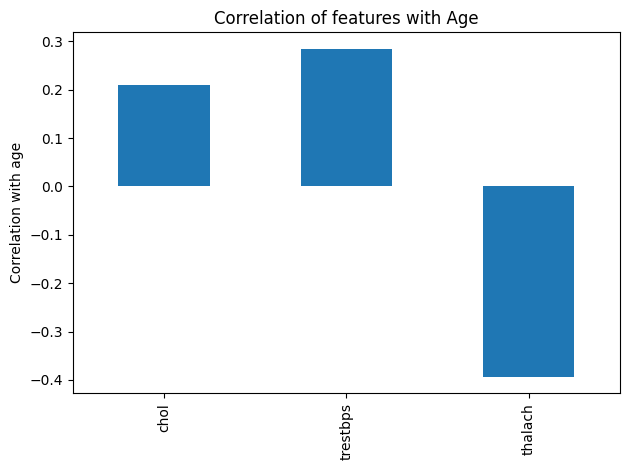

In [14]:
# Correlation with age
num_df = X[['age','chol','trestbps','thalach']].copy()
# Calculate correlation of each feature with 'age', excluding 'age' itself
corr = num_df.corr(numeric_only=True)['age'].drop('age')
plt.figure()
corr.plot(kind='bar')
plt.ylabel('Correlation with age')
plt.title('Correlation of features with Age')
plt.tight_layout()
plt.show()

## 4.Data Post-processing

In [15]:
OUTPUT_DIR = '../data/raw_and_fe_data/'

🤔**What is data post-processing?**


### 4.1 Raw Dataset

In [16]:
TARGET = 'target'
raw_feature_cols = [c for c in raw.columns if c != TARGET]
K = len(raw_feature_cols)
print("Number of features:", K)


X_all = raw[raw_feature_cols]
y_all = raw[TARGET]

Number of features: 13


In [17]:
cat_proc = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', MinMaxScaler())
])
num_proc = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocess = ColumnTransformer([
    ('num', num_proc, numeric_cols),
    ('cat', cat_proc, categorical_cols),
])
raw_pipeline = Pipeline([
    ('preprocess', preprocess),
])


In [18]:
# train 80%, temp 20%
X_train, X_temp, y_train, y_temp = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=RANDOM_SEED
)

# split 50% of 20% for val size and test size
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_SEED
)

X_raw_train = raw_pipeline.fit_transform(X_train, y_train)
X_raw_val = raw_pipeline.transform(X_val)
X_raw_test = raw_pipeline.transform(X_test)

print(f"X_raw_train shape: {X_raw_train.shape}")
print(f"X_raw_val shape: {X_raw_val.shape}")
print(f"X_raw_test shape: {X_raw_test.shape}")

X_raw_train shape: (242, 13)
X_raw_val shape: (30, 13)
X_raw_test shape: (31, 13)


In [19]:
# Get the feature names after preprocessing
preprocessed_feature_names = []
for name, transformer, columns in preprocess.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        preprocessed_feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        preprocessed_feature_names.extend(columns)

# Convert NumPy arrays to DataFrames
X_raw_train_df = pd.DataFrame(X_raw_train, columns=preprocessed_feature_names, index=X_train.index)
X_raw_val_df = pd.DataFrame(X_raw_val, columns=preprocessed_feature_names, index=X_val.index)
X_raw_test_df = pd.DataFrame(X_raw_test, columns=preprocessed_feature_names, index=X_test.index)

In [20]:
out_dir = Path(OUTPUT_DIR); out_dir.mkdir(parents=True, exist_ok=True)
pd.concat([X_raw_train_df, y_train.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_train.csv', index=False) # concat data and extract to csv
pd.concat([X_raw_val_df, y_val.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_val.csv', index=False)
pd.concat([X_raw_test_df, y_test.rename(TARGET)], axis=1).to_csv(out_dir / 'raw_test.csv', index=False)
print("Saved RAW splits. K (RAW features) =", K)

Saved RAW splits. K (RAW features) = 13


In [21]:
display(X_raw_train_df)
display(X_raw_train_df.isna().sum())

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
180,-0.729485,-0.395692,0.458139,0.708371,-0.445445,1.0,1.000000,0.0,1.0,0.0,0.5,0.000000,1.0
208,0.050166,-0.054513,0.230598,0.222495,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0
167,-0.061212,0.059213,0.723605,0.399178,-0.891627,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0
105,-0.061212,-1.305501,1.121803,0.266666,-0.891627,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,1.0
297,0.272924,0.514117,-0.167601,-1.190962,-0.713154,0.0,1.000000,0.0,0.0,1.0,0.5,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.829818,0.514117,2.733557,0.310836,0.179210,0.0,1.000000,0.0,1.0,0.0,0.5,0.000000,0.0
136,1.720848,0.798433,-1.438042,-1.102621,1.428521,1.0,1.000000,0.0,0.0,1.0,1.0,0.000000,1.0
2,1.386712,-0.623144,-0.395142,-0.925938,1.428521,1.0,1.000000,0.0,1.0,1.0,0.5,0.666667,1.0
189,1.609469,0.514117,0.078903,-0.175039,0.893102,1.0,0.666667,0.0,1.0,0.0,0.5,1.000000,1.0


,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0
sex,0
cp,0
fbs,0
restecg,0
exang,0


### 4.2 Feature Engineering Dataset

In [22]:
def add_new_features(Xdf):
    Xdf = Xdf.copy()
    if set(['chol','age']).issubset(Xdf.columns):# only create new feature if 2 cols exist
        Xdf['chol_per_age'] = Xdf['chol'] / Xdf['age']
    if set(['trestbps','age']).issubset(Xdf.columns):
        Xdf['bps_per_age'] = Xdf['trestbps'] / Xdf['age']
    if set(['thalach','age']).issubset(Xdf.columns):
        Xdf['hr_ratio'] = Xdf['thalach'] / Xdf['age']
    if 'age' in Xdf.columns:
        Xdf['age_bin'] = pd.cut(Xdf['age'], bins=5, labels=False).astype('category')
    return Xdf

generated_cats = ['age_bin']
generated_nums = ['chol_per_age','bps_per_age','hr_ratio']
all_cats = categorical_cols + generated_cats
all_nums = numeric_cols + generated_nums

print(f"all_cats: {all_cats}")
print(f"all_nums: {all_nums}")

all_cats: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_bin']
all_nums: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_per_age', 'bps_per_age', 'hr_ratio']


In [23]:
cat_proc = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_proc = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocess = ColumnTransformer([
    ('num', num_proc, all_nums),
    ('cat', cat_proc, all_cats),
])

feature_adder = FunctionTransformer(add_new_features, validate=False)

fe_pipeline = Pipeline([
    ('add_features', feature_adder),
    ('preprocess', preprocess),
    ('var_filter', VarianceThreshold(threshold=0.0)) # Variable filtering: Remove features with variance = 0
])



In [24]:
# Train and transform the train set
Xt_tr_np = fe_pipeline.fit_transform(X_train, y_train)

# Only use transform for val and test sets
Xt_va_np = fe_pipeline.transform(X_val)
Xt_te_np = fe_pipeline.transform(X_test)

print(f"Xt_tr_np.shape: {Xt_tr_np.shape}")

Xt_tr_np.shape: (242, 36)


In [25]:
ohe = fe_pipeline.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot']
ohe

OneHotEncoder(handle_unknown='ignore')

In [26]:
# create cols name
cat_names = []
for col, cats in zip(all_cats, ohe.categories_):
    for c in cats:
        cat_names.append(f"{col}_{c}") # e.g., thal_3.0, thal_6.0, thal_7.0
pre_names = list(all_nums) + cat_names

# filter cols
# return array true/false that show which features to keep or not
mask = fe_pipeline.named_steps['var_filter'].get_support()
eng_cols = [name for name, keep in zip(pre_names, mask) if keep]
print("Engineering cols: ", eng_cols)

# create df
Xt_tr = pd.DataFrame(Xt_tr_np, columns=eng_cols, index=X_train.index)
Xt_va = pd.DataFrame(Xt_va_np, columns=eng_cols, index=X_val.index)
Xt_te = pd.DataFrame(Xt_te_np, columns=eng_cols, index=X_test.index)

Engineering cols:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_per_age', 'bps_per_age', 'hr_ratio', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'age_bin_0.0', 'age_bin_1.0', 'age_bin_2.0', 'age_bin_3.0', 'age_bin_4.0']


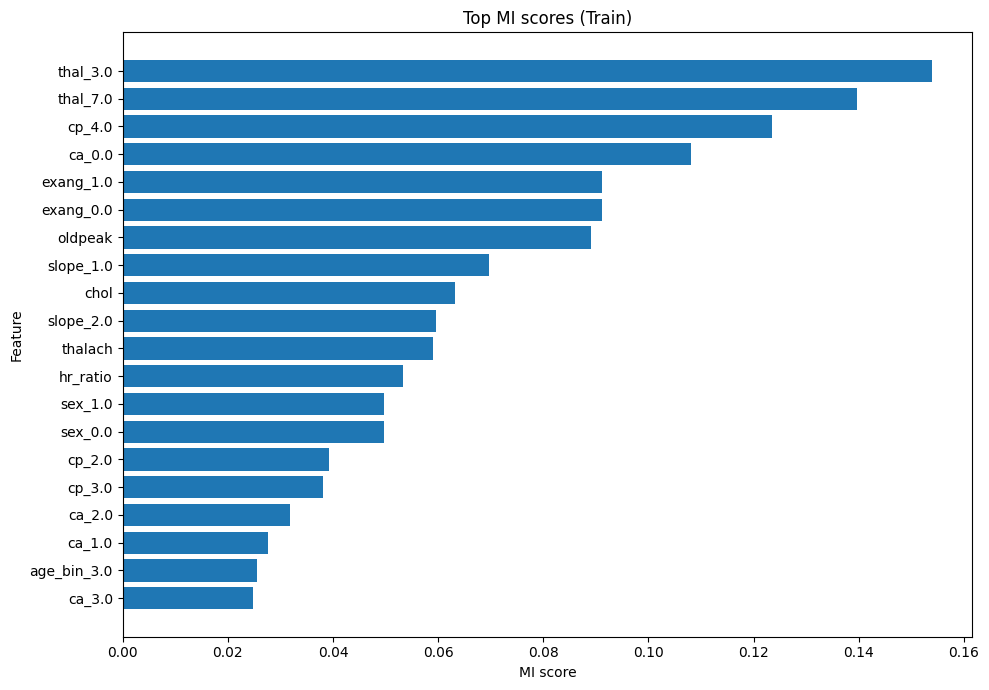

In [27]:
# Create an array (True/False) to mark One-Hot encoded (sex_, cp_,...) or clustered (age_bin_) columns as discrete variables
is_discrete = np.array([col.startswith('age_bin_') or any(col.startswith(pfx) for pfx in ['sex_','cp_','fbs_','restecg_','exang_','slope_','ca_','thal_']) for col in Xt_tr.columns], dtype=bool)
mi_scores = mutual_info_classif(Xt_tr.values, y_train.values, discrete_features=is_discrete, random_state=42)
mi_series = pd.Series(mi_scores, index=Xt_tr.columns).sort_values(ascending=False) # sort descending

# Visualize Top MI
topN = int(min(20, len(mi_series)))
top_mi = mi_series.head(topN).iloc[::-1]
plt.figure(figsize=(10, max(6, 0.35*topN)))
plt.barh(top_mi.index, top_mi.values) # Horizontal Bar Chart
plt.title('Top MI scores (Train)')
plt.xlabel('MI score'); plt.ylabel('Feature')
plt.tight_layout(); plt.show()

In [28]:
K = len([c for c in raw.columns if c != 'target'])
topk_cols = list(mi_series.head(K).index)
print("Selected TOP-K engineered features (K = RAW features):", K)
display(pd.Series(topk_cols, name="fe_topk_features").reset_index(drop=True))

fe_tr = Xt_tr[topk_cols].copy()
fe_tr['target'] = y_train.values
fe_va = Xt_va[topk_cols].copy()
fe_va['target'] = y_val.values
fe_te = Xt_te[topk_cols].copy()
fe_te['target'] = y_test.values

out_dir = Path(OUTPUT_DIR)
out_dir.mkdir(parents=True, exist_ok=True)
fe_tr.to_csv(out_dir / 'fe_train.csv', index=False)
fe_va.to_csv(out_dir / 'fe_val.csv', index=False)
fe_te.to_csv(out_dir / 'fe_test.csv', index=False)

print("Saved FE splits. K (FE features) =", K)

Selected TOP-K engineered features (K = RAW features): 13


,fe_topk_features
0,thal_3.0
1,thal_7.0
2,cp_4.0
3,ca_0.0
4,exang_1.0
5,exang_0.0
6,oldpeak
7,slope_1.0
8,chol
9,slope_2.0


Saved FE splits. K (FE features) = 13


In [29]:
display(fe_tr.head())
display(fe_tr.isna().sum())

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
180,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
208,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
167,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
105,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
297,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


,0
thal_3.0,0
thal_7.0,0
cp_4.0,0
ca_0.0,0
exang_1.0,0
exang_0.0,0
oldpeak,0
slope_1.0,0
chol,0
slope_2.0,0


In [30]:
# zip folder
# sudo apt-get install zip unzip
!zip -r dataset.zip "../data/raw_and_fe_data/"

  adding: ../data/raw_and_fe_data/ (stored 0%)
  adding: ../data/raw_and_fe_data/fe_train.csv (deflated 74%)
  adding: ../data/raw_and_fe_data/fe_val.csv (deflated 64%)
  adding: ../data/raw_and_fe_data/raw_test.csv (deflated 67%)
  adding: ../data/raw_and_fe_data/raw_train.csv (deflated 81%)
  adding: ../data/raw_and_fe_data/fe_test.csv (deflated 64%)
  adding: ../data/raw_and_fe_data/raw_val.csv (deflated 67%)
